lab3 - Метод Гаусса с перестановками

In [ ]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

In [ ]:
def euclidean_norm(vec):
    res = 0
    for el in vec:
        res += el**2
    return np.sqrt(res)

def mul_on_vector(matrix, vector):
    res = []
    for i in range(len(matrix)):
        el = 0
        for j in range(len(vector)):
            el += matrix[i][j] * vector[j]
        res.append(el)
    return res

def generate_matrix(l, r, n):
    a = np.random.uniform(l, r, (n, n))
    return a

def increase_diag_elems(a, diag):
    n = len(a)
    for i in range(0, len(a)):
        a[i][i] += diag * sum(abs(a[i][j]) if j != i else 0 for j in range(n))
    return a

def diag_dominance(a):
    return max(abs(a[i][i]) - sum(abs(a[i][j]) if j != i else 0 for j in range(len(a))) for i in range(len(a)))

def test(method, A, x):
    b = mul_on_vector(A, x)
    x_calc = method(A, b)
    return euclidean_norm(x - x_calc)

Стандартный метод Гаусса

In [ ]:
def gauss(matrix, vec):
    n = len(matrix)
    A = deepcopy(matrix)
    b = deepcopy(vec)
    x = np.zeros(shape=(n, ))
    # towards
    for i in range(n - 1):
        if A[i][i] == 0:
            for j in range(i + 1, n):
                if A[j][i] != 0:
                    A[i], A[j] = A[j], A[i]
                    break

        for j in range(i + 1, n):
            c = - A[j][i] / A[i][i]
            A[j] += c * A[i]
            b[j] += c * b[i]

    # backwards
    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    return np.array(x)


метод Гаусса с перестановкой по столбцам. Выбор главного элемента по строкам

In [ ]:
def gauss_with_columns_permutation(matrix, vec):
    n = len(matrix)
    A = deepcopy(matrix)
    b = deepcopy(vec)
    x = np.zeros(shape=(n, ))
    # towards
    for i in range(n - 1):
        # partial pivoting and swap
        max_index = np.argmax(np.abs(A[i:, i])) + i
        A[[i, max_index]] = A[[max_index , i]]
        b[i], b[max_index] = b[max_index], b[i]
        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    # backwards
    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    return np.array(x)


метод Гаусса с перестановкой по строкам. Выбор главного элемента по столбцам

In [ ]:
def gauss_with_rows_permutation(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)
    x_i = [i for i in range(n)]
    x = np.zeros(shape=(n, ))

    # towards
    for i in range(n - 1):
        # partial pivoting and swap
        max_index = np.argmax(np.abs(A[i, i:])) + i
        x_i[i], x_i[max_index] = x_i[max_index], x_i[i]
        for j in range(n):
            A[j][i], A[j][max_index] = A[j][max_index], A[j][i]
        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]

    # backwards
    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    x_copy = deepcopy(x)

    for i, order in enumerate(x_i):
        x[order] = x_copy[i]

    return np.array(x)


метод Гаусса с перестановкой по строкам и по столбцам

In [ ]:
def gauss_with_rows_and_columns_permutation(A, b):
    n = len(A)
    A = deepcopy(A)
    b = deepcopy(b)
    x_i = [i for i in range(n)]
    x = np.zeros(shape=(n, ))

    # towards
    for i in range(n - 1):
      # partial pivoting and swap
        max_index_col = np.argmax(np.abs(A[i:, i])) + i
        max_index_row = np.argmax(np.abs(A[i, i:])) + i
        if A[max_index_col][i] > A[i][max_index_row]:
            A[[i, max_index_col]] = A[[max_index_col , i]]
            b[i], b[max_index_col] = b[max_index_col], b[i]
        else:
            x_i[i], x_i[max_index_row] = x_i[max_index_row], x_i[i]
            for j in range(n):
                A[j][i], A[j][max_index_row] = A[j][max_index_row], A[j][i]

        for j in range(i + 1, n):
            f = A[j][i] / A[i][i]
            A[j] -= f * A[i]
            b[j] -= f * b[i]


    # backwards
    for i in range(n - 1, -1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i - 1, -1, -1):
            b[j] -= A[j][i] * x[i]

    x_copy = deepcopy(x)

    for i, order in enumerate(x_i):
        x[order] = x_copy[i]

    return np.array(x)


Графики

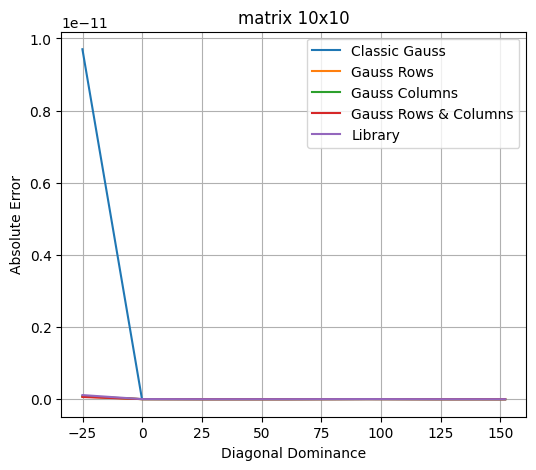

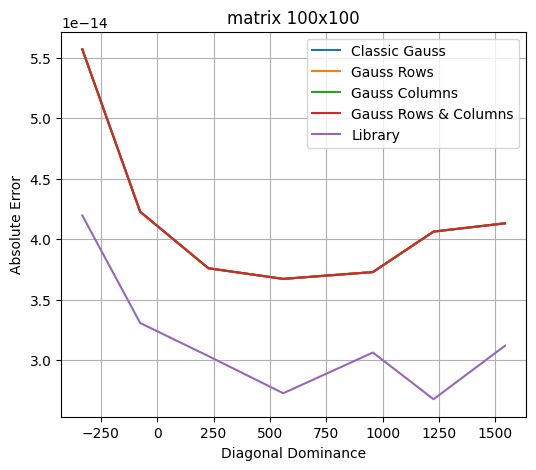

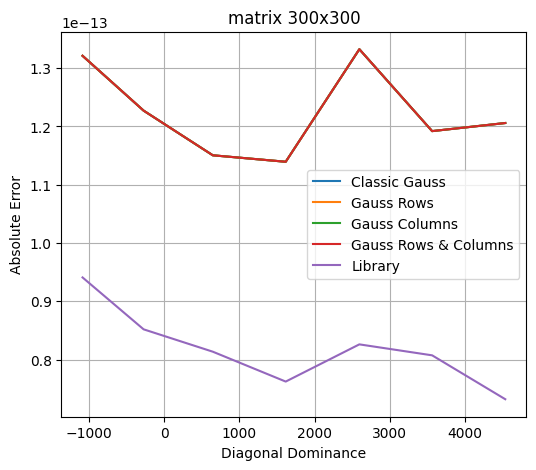

In [ ]:
coefs = [i * 0.2 for i in range(1, 22, 3)]

for d in [10, 100, 300]:
    diag = []

    y_gauss = []
    y_gauss_row = []
    y_gauss_col = []
    y_gauss_row_col = []
    y_numpy = []
    for c in coefs:
        A = generate_matrix(-10, 10, d)
        A = increase_diag_elems(A, c)
        x = np.random.uniform(-10, 10, d)

        diag.append(diag_dominance(A))
        y_gauss.append(test(gauss, A, x))
        y_gauss_row.append(test(gauss_with_rows_permutation, A, x))
        y_gauss_col.append(test(gauss_with_columns_permutation, A, x))
        y_gauss_row_col.append(test(gauss_with_rows_and_columns_permutation, A, x))
        y_numpy.append(test(np.linalg.solve, A, x))

    plt.figure(figsize=(6, 5))
    plt.title(f'matrix {d}x{d}')
    plt.xlabel("Diagonal Dominance")
    plt.ylabel("Absolute Error")
    plt.plot(diag, y_gauss, label='Classic Gauss')
    plt.plot(diag, y_gauss_row, label='Gauss Rows')
    plt.plot(diag, y_gauss_col, label='Gauss Columns')
    plt.plot(diag, y_gauss_row_col, label='Gauss Rows & Columns')
    plt.plot(diag, y_numpy, label='Library')
    plt.legend()
    plt.grid(True)
    plt.show()